# Laboratorio 1

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Problema 1

In [14]:
def activar_canales(imagen, color):

    imagen = cv2.imread(imagen)
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    new_image = np.zeros_like(imagen)

    match color:
        #azul
        case 1:
            new_image[:, :, 2] = imagen[:, :, 2]
        #verde
        case 2:
            new_image[:, :, 1] = imagen[:, :, 1]
        #rojo
        case 3:
            new_image[:, :, 0] = imagen[:, :, 0]

        case 10:
            #rojo y verde
            new_image[:, :, 0] = imagen[:, :, 0]  # Rojo
            new_image[:, :, 1] = imagen[:, :, 1]  # Verde

        case 20:
            #verde y azul
            new_image[:,:,1] = imagen[:,:,1]
            new_image[:,:,2] = imagen[:,:,2]

        case 30:
            #azul y rojo
            new_image[:,:,0] = imagen[:,:,0]
            new_image[:,:,2] = imagen[:,:,2]

        case _:
            new_image

    return new_image

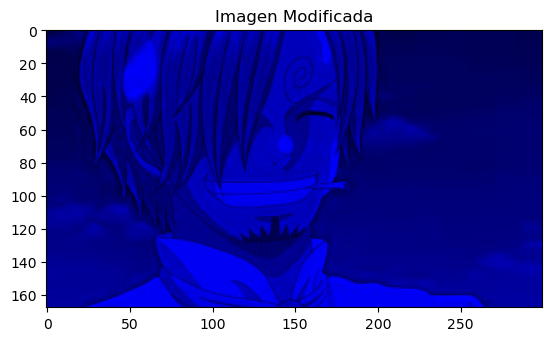

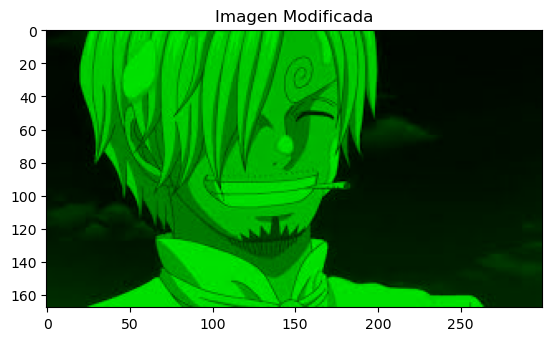

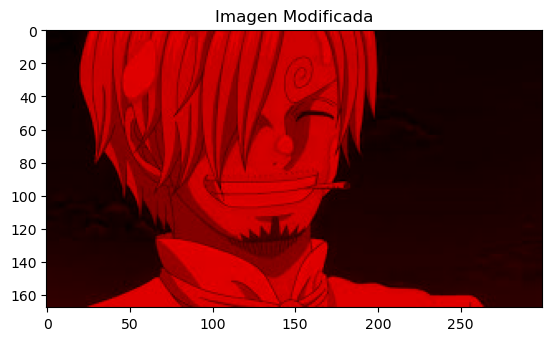

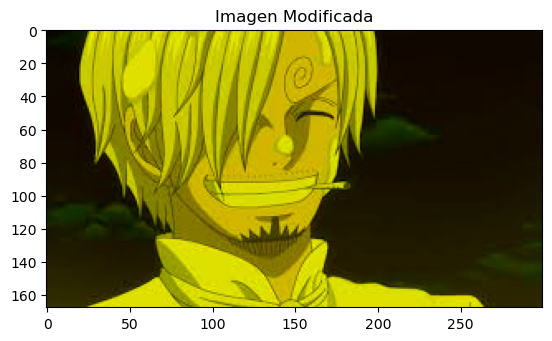

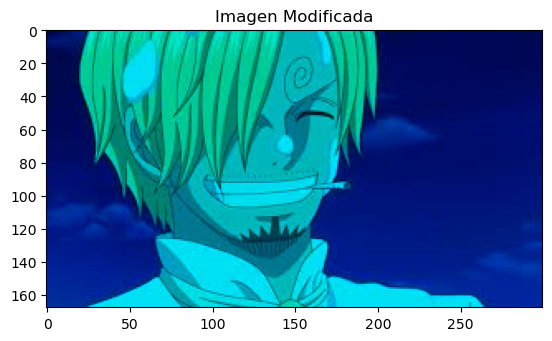

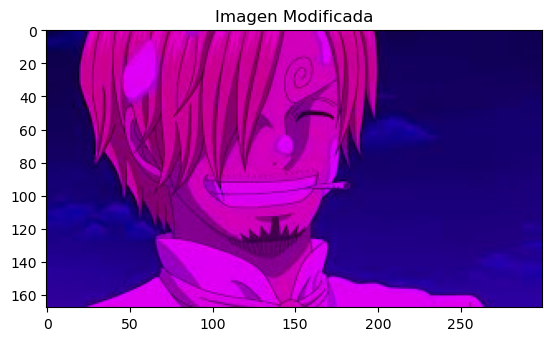

In [15]:
path = "sanjo.jpeg"
for i in [1,2,3,10,20,30]:
    color = i
    imagen_modificada = activar_canales(path, color)

    plt.imshow(imagen_modificada)
    plt.title('Imagen Modificada')
    plt.show()

## Problema 2

In [22]:
def combinarImg(path_r, path_g, path_b):
    r = cv2.imread(path_r, cv2.IMREAD_GRAYSCALE)
    #r = cv2.cvtColor(path_r, cv2.COLOR_BGR2RGB)

    g = cv2.imread(path_g, cv2.IMREAD_GRAYSCALE)
    #g = cv2.cvtColor(path_g, cv2.COLOR_BGR2RGB)

    b = cv2.imread(path_b, cv2.IMREAD_GRAYSCALE)
    #b = cv2.cvtColor(path_b, cv2.COLOR_BGR2RGB)

    new_image =  np.zeros((r.shape[0], r.shape[1], 3), dtype=np.uint8)

    new_image[:,:,0] = r
    new_image[:,:,1] = g
    new_image[:,:,2] = b

    return new_image

In [40]:
def combinarImg2(r, g, b):

    new_image =  np.zeros((r.shape[0], r.shape[1], 3), dtype=np.uint8)

    new_image[:,:,0] = r
    new_image[:,:,1] = g
    new_image[:,:,2] = b

    return new_image

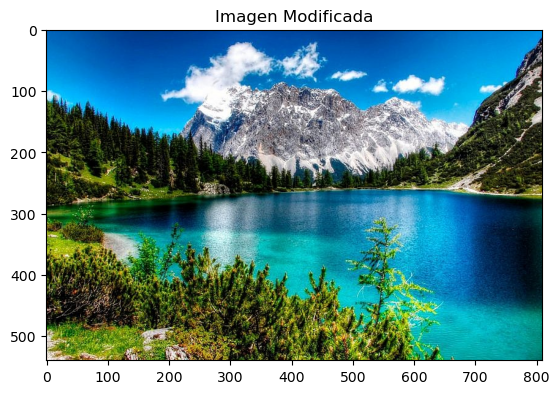

In [38]:
azul_path = 'imagen1/imagen1_salida_gray_azul.jpg'
rojo_path = 'imagen1/imagen1_salida_gray_rojo.jpg'
verde_path = 'imagen1/imagen1_salida_gray_verde.jpg'
imagen_color = combinarImg(rojo_path, verde_path, azul_path)

plt.imshow(imagen_color)
plt.title('Imagen Modificada')
plt.show()

## Problema 3

In [33]:
def img3d(imagen):
    imagen_color = cv2.imread(imagen)
    imagen_color = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)

    r = np.zeros_like(imagen_color)
    g = np.zeros_like(imagen_color)
    b = np.zeros_like(imagen_color)

    r[:, :, 0] = imagen_color[:, :, 0] 
    g[:, :, 1] = imagen_color[:, :, 1]  
    b[:, :, 2] = imagen_color[:, :, 2] 

    r_gray = cv2.cvtColor(r, cv2.COLOR_RGB2GRAY)
    g_gray = cv2.cvtColor(g, cv2.COLOR_RGB2GRAY)
    b_gray = cv2.cvtColor(b, cv2.COLOR_RGB2GRAY)

    return r_gray, g_gray, b_gray

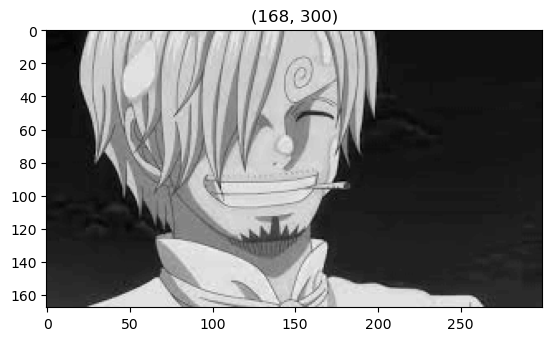

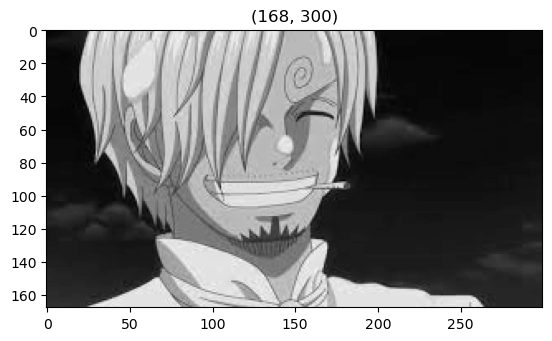

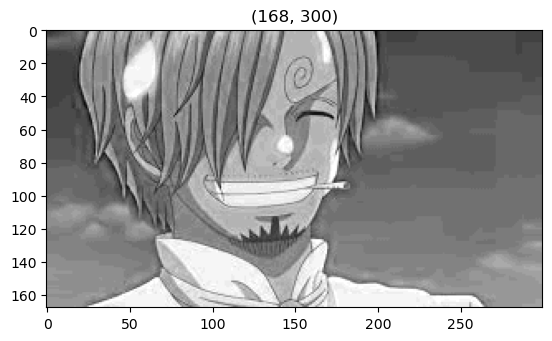

In [34]:
path = "sanjo.jpeg"
r,g,b = img3d(path)

plt.imshow(r, cmap='gray')
plt.title(r.shape)
plt.show()

plt.imshow(g, cmap='gray')
plt.title(g.shape)
plt.show()

plt.imshow(b, cmap='gray')
plt.title(b.shape)
plt.show()

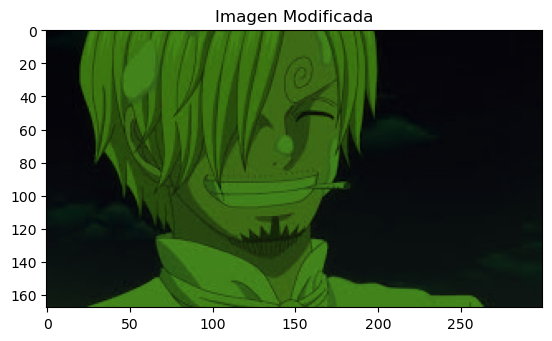

In [42]:
# prueba que funciona, volverlas a juntar:
sanji = combinarImg2(r, g, b)

plt.imshow(sanji)
plt.title('Imagen Modificada')
plt.show()

## Problema 4

In [46]:
def histoImg(imagen):

    imagen_color = cv2.imread(imagen)
    
    imagen_color = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)
    
    r, g, b = imagen_color[:, :, 0], imagen_color[:, :, 1], imagen_color[:, :, 2]
    gris = (r + g + b) / 3
    gris = gris.astype(np.uint8)

    hist_r, bins_r = np.histogram(r.flatten(), bins=256, range=[0, 256])
    hist_g, bins_g = np.histogram(g.flatten(), bins=256, range=[0, 256])
    hist_b, bins_b = np.histogram(b.flatten(), bins=256, range=[0, 256])
    hist_gray, bins_gray = np.histogram(gris.flatten(), bins=256, range=[0, 256])
    
    # Calcular medias
    media_r = np.mean(r)
    media_g = np.mean(g)
    media_b = np.mean(b)
    media_gray = np.mean(gris)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Histograma rojo
    axes[0, 0].plot(bins_r[:-1], hist_r, color='red')
    axes[0, 0].axvline(media_r, color='red', linestyle='dashed', linewidth=1)
    axes[0, 0].set_title('Histograma - Rojo')
    axes[0, 0].set_xlabel('Intensidad')
    axes[0, 0].set_ylabel('Número de píxeles')
    
    # Histograma verde
    axes[0, 1].plot(bins_g[:-1], hist_g, color='green')
    axes[0, 1].axvline(media_g, color='green', linestyle='dashed', linewidth=1)
    axes[0, 1].set_title('Histograma - Verde')
    axes[0, 1].set_xlabel('Intensidad')
    axes[0, 1].set_ylabel('Número de píxeles')
    
    # Histograma azul
    axes[1, 0].plot(bins_b[:-1], hist_b, color='blue')
    axes[1, 0].axvline(media_b, color='blue', linestyle='dashed', linewidth=1)
    axes[1, 0].set_title('Histograma - Azul')
    axes[1, 0].set_xlabel('Intensidad')
    axes[1, 0].set_ylabel('Número de píxeles')
    
    # Histograma grises
    axes[1, 1].plot(bins_gray[:-1], hist_gray, color='gray')
    axes[1, 1].axvline(media_gray, color='gray', linestyle='dashed', linewidth=1)
    axes[1, 1].set_title('Histograma - Escala de Grises')
    axes[1, 1].set_xlabel('Intensidad')
    axes[1, 1].set_ylabel('Número de píxeles')
    
    plt.tight_layout()
    plt.show()

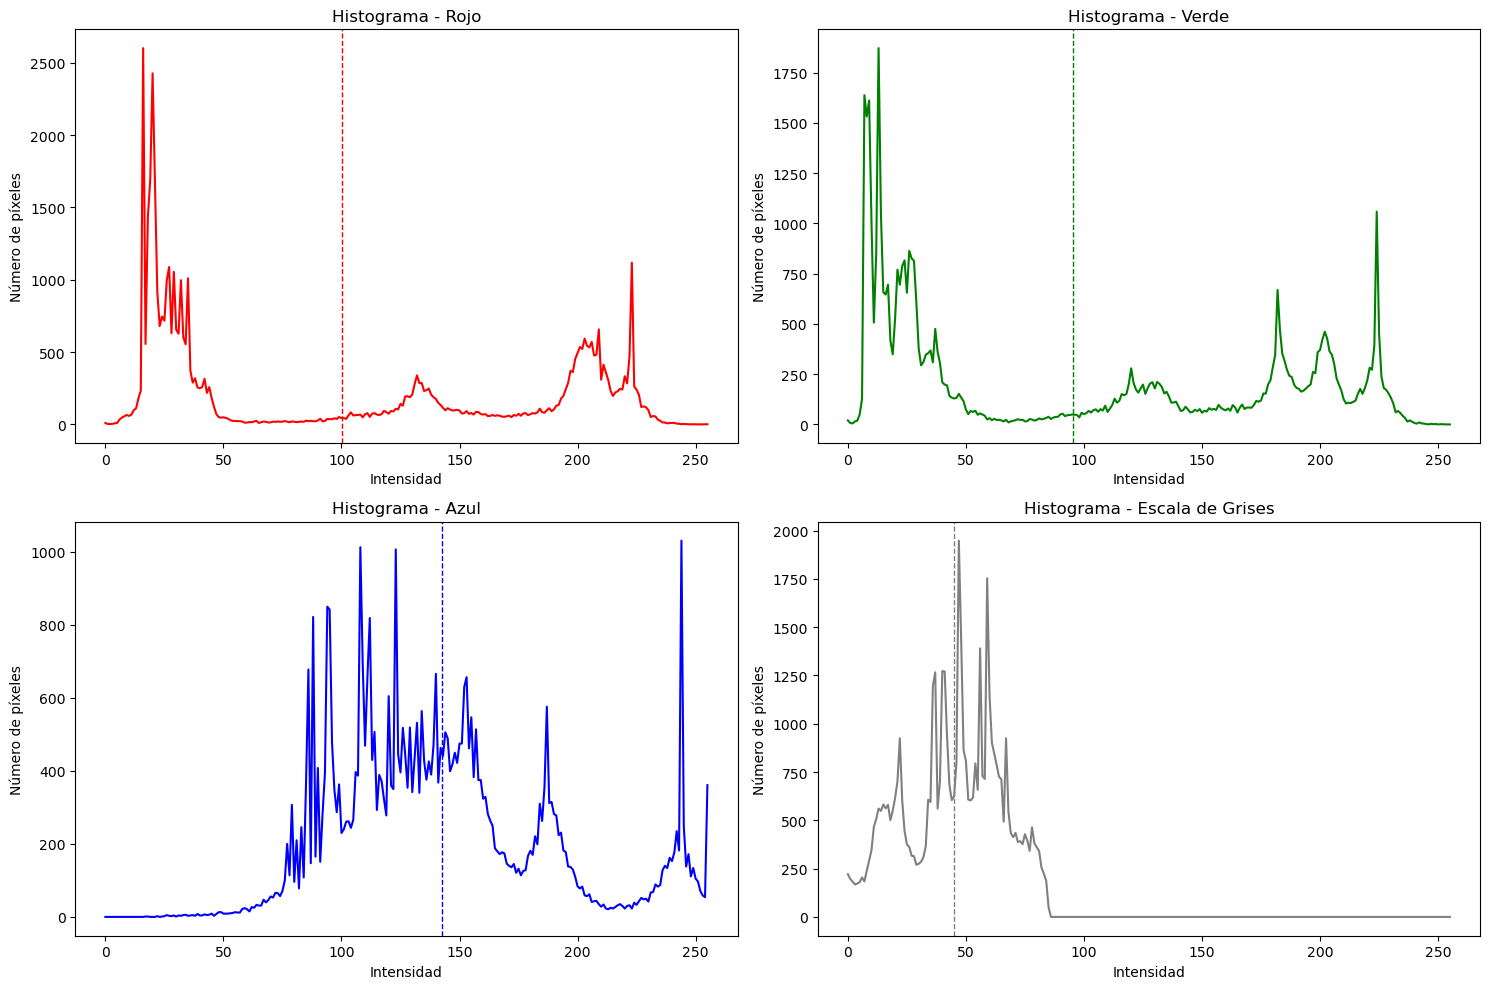

In [47]:
histoImg("sanjo.jpeg")

## Problema 5

In [49]:
def grisPonderado(imagen):

    imagen_color = cv2.imread(imagen)
    
    imagen_color = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)
    
    r, g, b = imagen_color[:, :, 0], imagen_color[:, :, 1], imagen_color[:, :, 2]
    
    # Aplicar la fórmula de escala de grises ponderada
    gris_ponderado = 0.299 * r + 0.587 * g + 0.114 * b
    
    # Convertir el resultado a un tipo entero sin signo
    gris_ponderado = gris_ponderado.astype(np.uint8)
    
    return gris_ponderado

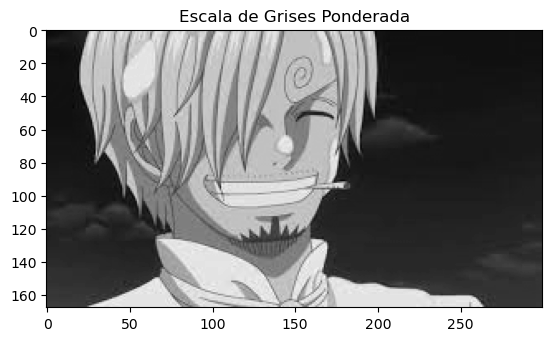

In [52]:
img_grisP = grisPonderado("sanjo.jpeg")

plt.imshow(img_grisP, cmap='gray')
plt.title('Escala de Grises Ponderada')
plt.show()

#### Conversión a Escala de Grises Ponderada
Es una conversión a una escala de grises donde se toma en cuenta la percepción del ojo humano a los colores, es más cómo nosotros vemos esos colores en la vida real y replicarlos.

##### Enfoque de Escala de Grises Ponderada
El enfoque de escala de grises ponderada asigna diferentes pesos a los canales de color rojo, verde y azul de acuerdo con la sensibilidad del ojo humano a estos colores. La fórmula utilizada es:

Gris = 0.299×R + 0.587×G + 0.114×B